<a href="https://colab.research.google.com/github/Sand08/Statistics-and-Machine-Learning/blob/main/Tree_and_KNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

data = pd.read_csv('bank-full.csv', sep=';')

data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


**Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

**Encoding and Normalization**

In [11]:
from sklearn.preprocessing import OneHotEncoder

# Separate features and target variable
X = data.drop(columns=['y'])  # Features
y = data['y']  # Target variable

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)  # Drop first to avoid multicollinearity

from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Normalize numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

**Train a Decision Tree Classifier**

In [13]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your preprocessed features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
dt_predictions = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Results:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Precision:", precision_score(y_test, dt_predictions, pos_label=1))
print("Recall:", recall_score(y_test, dt_predictions, pos_label=1))
print("F1-Score:", f1_score(y_test, dt_predictions, pos_label=1))
print("\nClassification Report:\n", classification_report(y_test, dt_predictions))


Decision Tree Classifier Results:
Accuracy: 0.877031958420878
Precision: 0.4756756756756757
Recall: 0.499054820415879
F1-Score: 0.4870848708487085

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7985
           1       0.48      0.50      0.49      1058

    accuracy                           0.88      9043
   macro avg       0.70      0.71      0.71      9043
weighted avg       0.88      0.88      0.88      9043



**Train a Random Forest Classifier**

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Precision:", precision_score(y_test, rf_predictions, pos_label=1))
print("Recall:", recall_score(y_test, rf_predictions, pos_label=1))
print("F1-Score:", f1_score(y_test, rf_predictions, pos_label=1))
print("\nClassification Report:\n", classification_report(y_test, rf_predictions))


Random Forest Classifier Results:
Accuracy: 0.9051199823067566
Precision: 0.6607717041800643
Recall: 0.388468809073724
F1-Score: 0.48928571428571427

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.66      0.39      0.49      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.68      0.72      9043
weighted avg       0.89      0.91      0.89      9043



**Train a Gradient Boosted Trees Classifier**

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train a Gradient Boosted Trees Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_predictions = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosted Trees Results:")
print("Accuracy:", accuracy_score(y_test, gb_predictions))
print("Precision:", precision_score(y_test, gb_predictions, pos_label=1))
print("Recall:", recall_score(y_test, gb_predictions, pos_label=1))
print("F1-Score:", f1_score(y_test, gb_predictions, pos_label=1))
print("\nClassification Report:\n", classification_report(y_test, gb_predictions))


Gradient Boosted Trees Results:
Accuracy: 0.9043459029083268
Precision: 0.6459909228441755
Recall: 0.40359168241965976
F1-Score: 0.4968004653868528

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.65      0.40      0.50      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



**Implementing KNN and Finding the Optimal k**

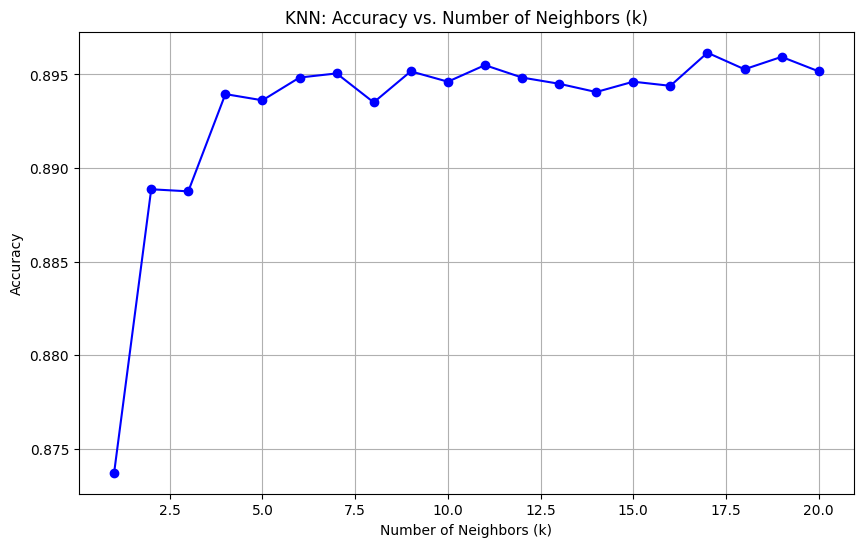

Optimal k: 17


In [24]:
from sklearn.preprocessing import StandardScaler

# Normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Evaluate KNN for different values of k
k_values = range(1, 21)  # Try k from 1 to 20
accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    predictions = knn_model.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, predictions))

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('KNN: Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

# Optimal k
optimal_k = k_values[accuracies.index(max(accuracies))]
print(f"Optimal k: {optimal_k}")


In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Train the KNN model with the optimal k
final_knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn_model.fit(X_train_scaled, y_train)

# Predict and evaluate
final_predictions = final_knn_model.predict(X_test_scaled)

# Evaluation metrics
print("KNN Model Results:")
print("Accuracy:", accuracy_score(y_test, final_predictions))
print("Precision:", precision_score(y_test, final_predictions, pos_label=1))
print("Recall:", recall_score(y_test, final_predictions, pos_label=1))
print("F1-Score:", f1_score(y_test, final_predictions, pos_label=1))
print("\nClassification Report:\n", classification_report(y_test, final_predictions))


KNN Model Results:
Accuracy: 0.8961627778392126
Precision: 0.6454767726161369
Recall: 0.2495274102079395
F1-Score: 0.35991820040899797

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.65      0.25      0.36      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.62      0.65      9043
weighted avg       0.88      0.90      0.88      9043



In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Example: Evaluate KNN for k=3, k=5, and k=7

# Train and evaluate KNN with k=3
knn_k3 = KNeighborsClassifier(n_neighbors=3)
knn_k3.fit(X_train_scaled, y_train)
predictions_k3 = knn_k3.predict(X_test_scaled)
accuracy_k3 = accuracy_score(y_test, predictions_k3)
print(f"Accuracy for k=3: {accuracy_k3}")

# Train and evaluate KNN with k=5
knn_k5 = KNeighborsClassifier(n_neighbors=5)
knn_k5.fit(X_train_scaled, y_train)
predictions_k5 = knn_k5.predict(X_test_scaled)
accuracy_k5 = accuracy_score(y_test, predictions_k5)
print(f"Accuracy for k=5: {accuracy_k5}")

# Train and evaluate KNN with k=7
knn_k7 = KNeighborsClassifier(n_neighbors=7)
knn_k7.fit(X_train_scaled, y_train)
predictions_k7 = knn_k7.predict(X_test_scaled)
accuracy_k7 = accuracy_score(y_test, predictions_k7)
print(f"Accuracy for k=7: {accuracy_k7}")


Accuracy for k=3: 0.8887537321685282
Accuracy for k=5: 0.8936193741015149
Accuracy for k=7: 0.8950569501271702
